# How are in-demand skills trending for Data Analysts?

In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DA_Serbia = df[(df['job_country'] == 'Serbia') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_Serbia['job_posted_month_no'] = df_DA_Serbia['job_posted_date'].dt.month
df_DA_Serbia_exploded = df_DA_Serbia.explode('job_skills')

In [25]:
pivot = df_DA_Serbia_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
pivot.loc['Total'] = pivot.sum()

pivot = pivot[pivot.loc['Total'].sort_values(ascending=False).index]
pivot.drop('Total', inplace=True)
pivot

job_skills,sql,python,excel,tableau,power bi,r,sap,sas,c#,spss,...,docker,gitlab,golang,google chat,kubernetes,matplotlib,microstrategy,planner,plotly,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,4,3,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,6,8,4,1,4,2,2,0,1,...,0,0,0,0,0,0,1,0,0,0
3,11,8,7,8,6,9,2,8,2,3,...,0,0,0,0,0,0,0,0,0,0
4,7,10,6,8,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,4,5,4,3,2,3,2,1,2,...,0,0,0,0,0,0,0,0,0,0
6,8,6,8,3,3,3,2,2,0,3,...,0,0,0,0,0,1,0,1,0,0
7,8,8,3,4,2,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
8,15,12,3,5,4,1,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
9,10,5,3,5,8,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
DA_Totals = df_DA_Serbia.groupby('job_posted_month_no')['job_title_short'].agg('size')
DA_Totals

job_posted_month_no
1     11
2     19
3     24
4     17
5     17
6     19
7     13
8     18
9     10
10    14
11    20
12    13
Name: job_title_short, dtype: int64

In [55]:
df_DA_Serbia_percent = pivot.div(DA_Totals / 100, axis=0)
df_DA_Serbia_percent

job_skills,sql,python,excel,tableau,power bi,r,sap,sas,c#,spss,...,docker,gitlab,golang,google chat,kubernetes,matplotlib,microstrategy,planner,plotly,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,27.272727,27.272727,27.272727,36.363636,27.272727,9.090909,36.363636,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,47.368421,31.578947,42.105263,21.052632,5.263158,21.052632,10.526316,10.526316,0.000000,5.263158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.263158,0.000000,0.000000,0.000000
3,45.833333,33.333333,29.166667,33.333333,25.000000,37.500000,8.333333,33.333333,8.333333,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,41.176471,58.823529,35.294118,47.058824,23.529412,11.764706,5.882353,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,47.058824,23.529412,29.411765,23.529412,17.647059,11.764706,17.647059,11.764706,5.882353,11.764706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,42.105263,31.578947,42.105263,15.789474,15.789474,15.789474,10.526316,10.526316,0.000000,15.789474,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.263158,0.000000,5.263158,0.000000,0.000000
7,61.538462,61.538462,23.076923,30.769231,15.384615,7.692308,7.692308,15.384615,15.384615,7.692308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,83.333333,66.666667,16.666667,27.777778,22.222222,5.555556,5.555556,0.000000,22.222222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,100.000000,50.000000,30.000000,50.000000,80.000000,0.000000,10.000000,0.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_DA_Serbia_percent.reset_index(inplace=True)
df_DA_Serbia_percent['job_posted_month'] = df_DA_Serbia_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

df_DA_Serbia_percent.set_index('job_posted_month', inplace=True)
df_DA_Serbia_percent.drop(columns='job_posted_month_no', inplace=True)




In [71]:
df_DA_Serbia_percent.set_index('job_posted_month', inplace=True)


In [73]:
df_DA_Serbia_percent.drop(columns='index', inplace=True)

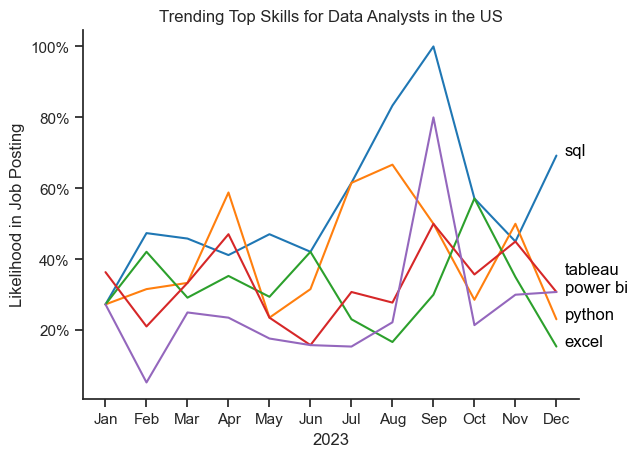

In [91]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_Serbia_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    if i == 3:
        continue
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.text(11.2, df_plot.iloc[-1, 3] + 5, df_plot.columns[3], color='black')

plt.show()
